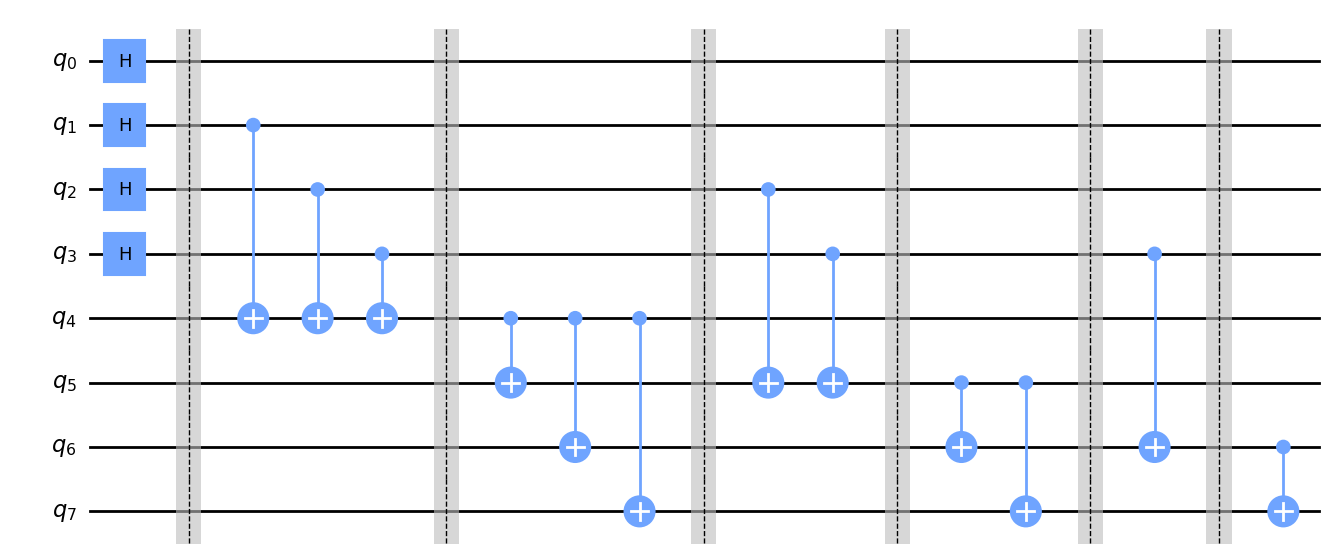

In [21]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

quantum_circuit = QuantumCircuit(8)

# Les 4 premiers qubits représentent les possibilités de couleur de cheveux des 4 personnages
# Les 4 derniers représentent le raisonnement des personnages
quantum_circuit.h(range(0, 4))

quantum_circuit.barrier()

# On stocke dans le qubit 4 l'information donné par le premier personnage
quantum_circuit.cx(1, 4)
quantum_circuit.cx(2, 4)
quantum_circuit.cx(3, 4)

quantum_circuit.barrier()

# Les personnages restant récupèrent l'information donnée par le premier personnage
quantum_circuit.cx(4, 5)
quantum_circuit.cx(4, 6)
quantum_circuit.cx(4, 7)

quantum_circuit.barrier()

# On stocke dans le qubit 5 l'information donné par le deuxième personnage
quantum_circuit.cx(2, 5)
quantum_circuit.cx(3, 5)

quantum_circuit.barrier()

# Les personnages restant récupèrent l'information donnée par le deuxième personnage
quantum_circuit.cx(5, 6)
quantum_circuit.cx(5, 7)

quantum_circuit.barrier()

# On stocke dans le qubit 6 l'information donné par le troisième personnage
quantum_circuit.cx(3, 6)

quantum_circuit.barrier()

# Le dernier personnage restant récupèrent l'information donnée par le troisième personnage
quantum_circuit.cx(6, 7)

quantum_circuit.draw('mpl')

In [20]:
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(quantum_circuit, simulator)
qobj = assemble(transpiled_circuit)
results = simulator.run(qobj).result()

counts = results.get_counts()
plot_histogram(counts)


C:\Users\basti\AppData\Local\Temp\ipykernel_16072\1321630212.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = simulator.run(qobj).result()


QiskitError: 'No counts for experiment "0"'